가상환경에 torch, transformer 설치

In [29]:
from transformers import ElectraModel, ElectraTokenizer, TextClassificationPipeline, pipeline

model = ElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator")
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")
sentiment_classifier = pipeline('sentiment-analysis', tokenizer=tokenizer, model=model)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The model 'ElectraModel' is not supported for sentiment-analysis. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'B

In [1]:
import torch
import pandas as pd
import numpy as np
import csv
from hanspell import spell_checker

In [2]:
data_kurly = pd.read_csv('C:/Users/NT550-048/Desktop/잇더/data/data_kurly_sentiment.csv')

In [3]:
data_kurly.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
data_kurly.to_excel('C:/Users/NT550-048/Desktop/잇더/data/data_kurly_sentiment.xlsx')

In [39]:
data_kurly[data_kurly['pred_score']<=0.85]

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score
22,1000098225,일반,유**,[아우름] 바다를 품은 문어솥밥키트,편한데 비싼게 사실이어요,2023.07.09,0,0,0.769062
28,1000098225,화이트,정**,[아우름] 바다를 품은 톳 해물솥밥키트,생각보다 해물양이 많이 있지는 않았어요,2023.07.08,0,0,0.696754
64,1000098225,프렌즈,김**,[아우름] 바다를 품은 문어솥밥키트,먹고싶어서 구매했는데 냉동이다보니 아직 먹어보질 못했어요,2023.06.29,0,1,0.632900
91,1000098225,프렌즈,황**,[아우름] 바다를 품은 톳 해물솥밥키트,냉동실 보관 비상식량.,2023.06.24,0,0,0.839003
92,1000098225,화이트,채**,[아우름] 바다를 품은 문어솥밥키트,맛나요 아주 좋아요,2023.06.24,0,1,0.803765
...,...,...,...,...,...,...,...,...,...
12410,5131430,퍼플,최**,[온하루] 한돈 건나물 솥밥키트,컬리에서 솥밥키트 열심히 삽니다,2022.05.20,0,1,0.829748
12418,5131430,퍼플,이**,[온하루] 한돈 건나물 솥밥키트,알수없는 그냥 건강식이다 먹음,2022.05.17,0,1,0.624802
12421,5131430,퍼플,김**,[온하루] 한돈 건나물 솥밥키트,후기보고 구매했는데 조금 슴슴한 맛이예요,2022.05.16,0,0,0.836472
12425,5131430,퍼플,최**,[온하루] 한돈 건나물 솥밥키트,맛있어요 들기름 향 좋아요,2022.05.15,0,1,0.794486


In [29]:
spell_checker.check(data_kurly['ReviewText'][12335])

Checked(result=True, original='소스가 흘러서 왔어요 포장에 좀 더 신경을 써야할 것 같습니다 맛은 기대만큼은 아니지만 먹을만 했습니다', checked='소스가 흘러서 왔어요 포장에 좀 더 신경을 써야 할 것 같습니다 맛은 기대만큼은 아니지만 먹을만했습니다', errors=2, words=OrderedDict([('소스가', 0), ('흘러서', 0), ('왔어요', 0), ('포장에', 0), ('좀', 0), ('더', 0), ('신경을', 0), ('<em', 0), ("class='green_text'>써야", 0), ('할</em>', 0), ('것', 0), ('같습니다', 0), ('맛은', 0), ('기대만큼은', 0), ('아니지만', 0), ("class='green_text'>먹을만했습니다</em>", 0)]), time=0.118743896484375)

In [36]:
data_kurly['ReviewText']

0                                           간단한 한끼대용으로 좋네요
1                                             맛있어서 재구매했어요!
2                                           아침대용으로 간단하고좋아요
3                                             톳좋아해서 주문했어요.
4                         지난 번에 간편하면서도 맛있게 먹어서 또 주문 했습니다. 
                               ...                        
12431                                         깔끔하고 간편하네요~~
12432                               연속해서 먹을 정도로 맛잇습니다 . :)
12433    레시피 그대로 하니까 잘 됐어요. 고추지양념 비벼먹으니 더 맛있어요 향도 좋고 정말...
12434                                   또 주문햇어요 재주문을 부르는 맛
12435             주문하는거 매번 놓쳤는데ㅠ 패키지부터 맛집이네요ㅋ 국내산 재료라 좋아요!
Name: ReviewText, Length: 12436, dtype: object

# hanspell

가상환경에 py-hanspell 설치 후 진행

In [2]:
from hanspell import spell_checker

In [34]:
review_list = data_kurly['ReviewText'].to_list()

In [35]:
review_fixed = []
for i in range(len(review_list)):
    try:
        review_fixed.append(spell_checker.check(review_list[i]).checked)
    except:
        review_fixed.append('ERROR')

In [33]:
data_kurly.to_csv("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_temp.csv")

In [ ]:
# 에러 발생
# data_kurly['Fixed_ReviewText'] = data_kurly['ReviewText'].apply(lambda x:spell_checker.check(x).checked)

In [29]:
data_kurly = pd.read_csv("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_temp.csv")

In [30]:
data_kurly.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
data_kurly[data_kurly['fixed_ReviewText']=='ERROR']

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score,tokens,fixed_ReviewText


In [38]:
data_kurly['ReviewText'][12079]

'조선 백미 ,  현미 로 간단하고 맛있는 한끼 해먹었습니다.'

In [37]:
data_kurly['ReviewText'][12079] = data_kurly['ReviewText'][12079].replace('&',', ')

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_13460\3519716135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kurly['ReviewText'][12079] = data_kurly['ReviewText'][12079].replace('&',', ')


In [39]:
spell_checker.check(data_kurly['ReviewText'][12079]).checked

'조선 백미,  현미로 간단하고 맛있는 한 끼 해먹었습니다.'

In [40]:
data_kurly['fixed_ReviewText'][12079] = spell_checker.check(data_kurly['ReviewText'][12079]).checked

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_13460\18777545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kurly['fixed_ReviewText'][12079] = spell_checker.check(data_kurly['ReviewText'][12079]).checked


In [41]:
data_kurly['fixed_ReviewText'][12079]

'조선 백미,  현미로 간단하고 맛있는 한 끼 해먹었습니다.'

# 기타

In [19]:
# 이모티콘 제거
def rm_emoji(data):
    return data.encode('utf-8', 'ignore').decode('utf-8')

In [20]:
rm_emoji(txt_temp)

'3인식구 솥에 육수,소고기넣고 밥지으니 진짜 냄새부터 넘 맛났어용..꺄  간편하고 소고기양도 은근되고 간도맞고!♡ 버섯도넣으니 더맛났구용 미나리는 밥다하고 따로넣어서 싱싱하게 먹었어요!   1만원도 안되는 돈으로 세식구 영양밥 해먹으니 넘 든든하고 좋았습니다^^'

In [ ]:
spell_checker.CheckResult

# 부산대 맞춤법 교정

In [12]:
import requests
import json
from bs4 import BeautifulSoup

In [14]:
text = data_kurly['ReviewText'][0]
response = requests.post('http://164.125.7.61/speller/results', data={'text1': text})
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible">
<title>한국어 맞춤법/문법 검사기</title>
<link href="css/speller.css" rel="stylesheet" type="text/css"/>
<link href="css/redesign.css" rel="stylesheet" type="text/css"/>
<script src="js/jquery-3.3.1.min.js" type="text/javascript"></script>
<script src="js/speller.js" type="text/javascript"></script>
<script type="text/javascript">
$(document).ready(function(){
	data = [{"str":"간단한 한끼대용으로 좋네요","errInfo":[{"help":"수관형사와 단위를 나타내는 명사는 서로 띄어 써야 합니다.","errorIdx":0,"correctMethod":1,"start":4,"errMsg":"","end":10,"orgStr":"한끼대용으로","candWord":"한 끼 대용으로"},{"help":"종결어미 다음에 쓰거나 문장을 마치면서 쓰는 종결형 문장부호는 종결어미 다음에 바로 붙여서 써야 바릅니다.<br/><br/>(예) 사람은 생각하는 동물이다 .(X)<br/>-&gt; 사람은 생각하는 동물이다.(O)<br/>이 아기는 크면 얼마나 예쁠까 ?(X)<br/>-&gt; 이 아기는 크면 얼마나 예쁠까?(O)<br/>달이 참 밝구나 !(X)<br/>-&gt; 달이 참 밝구나!(O)","errorIdx":1,"correctMethod":5,"start":11,"errMsg":"","end":14,"orgStr":"좋네요","candWord":"좋네요."}],"idx":0}];
	p

In [8]:
# 1. 텍스트 준비 & 개행문자 처리
text = text.replace('\n', '\r\n')
# 2. 맞춤법 검사 요청 (requests)
response = requests.post('http://164.125.7.61/speller/results', data={'text1': text})
# 3. 응답에서 필요한 내용 추출 (html 파싱)
data = response.text.split('data = [', 1)[-1].rsplit('];', 1)[0]
# 4. 파이썬 딕셔너리 형식으로 변환
data = json.loads(data)
# 5. 교정 내용 출력
print(data['errInfo'])

NameError: name 'text' is not defined

# 토큰화

In [5]:
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran
# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
# 한글 외의 모든 글자를 제거한다.
# 한글 정규식을 이용하여 한글 외의 모든 글자를 제거한다.

import re

def text_clearing(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result


In [41]:
data_kurly["ko_review"] = data_kurly["ReviewText"].apply(lambda x : text_clearing(x))

In [45]:
# konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출한다.
def get_pos (x) :
    tagger = Okt()
    #pos = tagger.pos(x)
    pos = tagger.pos(x, norm = True, stem = True)
    
    # 단어와 품사를 합쳐서 하나의 단어로 만들어준다.
    result = []
    
    # 형태소의 수만큼 반복한다.
    # 조사인 것과 명사인 것이 같을 수 있기 때문에 구분해준다.
    # 형태소 벡터를 만들때 추후 사용
    for a1 in pos :
        result.append(f'{a1[0]}/{a1[1]}')
    
    return result

In [64]:
get_pos(data_kurly['fixed_ReviewText'][3])

['톳/Noun', '좋아하다/Adjective', '주문/Noun', '하다/Verb', './Punctuation']

In [97]:
data_kurly['tokens'] = data_kurly['fixed_ReviewText'].apply(lambda x:get_pos(x))

In [65]:
tokens = []
for i in range(len(data_kurly)):
    try:
        tokens.append(get_pos(data_kurly['fixed_ReviewText'][i]))
    except:
        print('ERROR:',i)
        tokens.append('ERROR')

ERROR: 1083
ERROR: 1198
ERROR: 3263
ERROR: 5034
ERROR: 5533
ERROR: 8168
ERROR: 8522
ERROR: 10039
ERROR: 10253
ERROR: 10290


In [82]:
data_kurly['ReviewText'][1083]

"요즘 같이 추운 날씨에는 집 밖을 나가는 데에도 큰 용기가 필요하죠ㅠㅠ 배달 음식은 넘 지겹고 맛도 없고ㅠㅠ  그래서 내일 새벽 문 앞에 놔줄 컬리가 떠올라 검색하다가 요 밀키트를 발견했어요ㅎㅎ 바로바로 이름만 들어도 해물향 가득한  '바다를 품은 톳 문어솥밥키트'♡   다음 날 저녁, 바로 요리해서 먹어봤어요 결론부터 말하면 별 다섯개!! ★★★★★ 강추에용 양도 넉넉해서 남편이랑 애기랑 3인이 부족하지 않게 잘 먹었습니당  먹기 좋게 손질한 문어와 톳, 표고버섯 등 솥밥 재료가 개별 포장되어 있구요 밥을 지을 떄 넣는 소스와 양념장도 동봉되어 있어서 좋았어요!  일단 쌀(집에 있는!)을 꺠끗이 씻고 쌀만 건져서 솥에 담고요 동봉된 소스과 재료를 예쁘게(이왕이면^^) 펴서 올리고  강불에서 익히다가 중불에서 10분 정도, 불 끄고 뜸 들이면 완성ㅎㅎ  함께 들어 있는 양념장에 쪽파도 송송 썰어넣고 쓱쓱 비벼 먹으니 꿀맛이에요 문어가 신선한지, 전혀 비리지 않고 쫄깃, 탱글탱글해서 식감도 좋구요 색다르면서도 근사한 요리로 한끼 먹으니 만족도 최고!  후기 쓰는데 또 먹고 싶네요^^;; 전 재구매 결제하러 갑니다ㅎㅎ 꼭 드셔보세요~~"

In [102]:
sum(data_kurly['fixed_ReviewText'].isna())

0

In [103]:
data_kurly.to_csv("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_tokens.csv")

# 500자이상 리뷰 처리

In [88]:
from kss import split_sentences
split_sentences(data_kurly['ReviewText'][1083])

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



['요즘 같이 추운 날씨에는 집 밖을 나가는 데에도 큰 용기가 필요하죠ㅠㅠ',
 '배달 음식은 넘 지겹고 맛도 없고ㅠㅠ  그래서 내일 새벽 문 앞에 놔줄 컬리가 떠올라 검색하다가 요 밀키트를 발견했어요ㅎㅎ',
 "바로바로 이름만 들어도 해물향 가득한  '바다를 품은 톳 문어솥밥키트'♡   다음 날 저녁, 바로 요리해서 먹어봤어요",
 '결론부터 말하면 별 다섯개!! ★★★★★',
 '강추에용 양도 넉넉해서 남편이랑 애기랑 3인이 부족하지 않게 잘 먹었습니당',
 '먹기 좋게 손질한 문어와 톳, 표고버섯 등 솥밥 재료가 개별 포장되어 있구요',
 '밥을 지을 떄 넣는 소스와 양념장도 동봉되어 있어서 좋았어요!',
 '일단 쌀(집에 있는!)을 꺠끗이 씻고 쌀만 건져서 솥에 담고요',
 '동봉된 소스과 재료를 예쁘게(이왕이면^^) 펴서 올리고  강불에서 익히다가 중불에서 10분 정도, 불 끄고 뜸 들이면 완성ㅎㅎ  함께 들어 있는 양념장에 쪽파도 송송 썰어넣고 쓱쓱 비벼 먹으니 꿀맛이에요',
 '문어가 신선한지, 전혀 비리지 않고 쫄깃, 탱글탱글해서 식감도 좋구요',
 '색다르면서도 근사한 요리로 한끼 먹으니 만족도 최고!',
 '후기 쓰는데 또 먹고 싶네요^^;;',
 '전 재구매 결제하러 갑니다ㅎㅎ',
 '꼭 드셔보세요~~']

In [96]:
# 500자 이상 리뷰는 hanspell 실행 불가
# 문장별로 쪼개서 hanspell 수행
nums = [1083, 1198, 3263, 5034, 5533, 8168, 8522, 10039, 10253, 10290]
for n in nums:
    temp_longreview_list = split_sentences(data_kurly['ReviewText'][n])
    longreview_checked = []
    for txt in temp_longreview_list:
        longreview_checked.append(spell_checker.check(txt).checked)
    data_kurly['fixed_ReviewText'][n] = ' '.join(longreview_checked)

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_13460\2676076113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kurly['fixed_ReviewText'][n] = ' '.join(longreview_checked)


In [12]:
data_kurly['tokens'][25]

['처음/Noun', '솓밥/Noun', '해보다/Verb', '사보다/Verb', '맛있다/Adjective']

In [49]:
index_vectorizer = CountVectorizer(tokenizer=lambda x : get_pos(x))

In [52]:
#index_vectorizer.fit_transform(df["ko_review"].tolist())
index_vectorizer.fit_transform

AttributeError: 'CountVectorizer' object has no attribute 'fixed_vocabulary_'

# 빈도분석

In [106]:
data_kurly[data_kurly['pred_label']==0]['tokens']

11       [생각/Noun, 보단/Josa, 비리다/Adjective, 후기/Noun, 가/J...
18       [조개/Noun, 가/Josa, 있다/Adjective, 좀/Noun, 비려/Nou...
22               [펴다/Verb, 비싸다/Adjective, 게/Noun, 사다/Verb]
28       [생각/Noun, 보다/Josa, 해물/Noun, 양/Noun, 이/Josa, 많이...
61       [새벽/Noun, 배송/Noun, 이/Josa, 아니다/Adjective, ,/Pu...
                               ...                        
12399    [고기/Noun, 가/Josa, 좀/Noun, 단단하다/Adjective, 아기/N...
12401    [그저/Adverb, 그럭/Noun, 밥맛/Noun, 이네/Josa, 요/Noun,...
12407    [압력밥솥/Noun, 에/Josa, 하다/Verb, 나물/Noun, 이/Josa, ...
12421    [후기/Noun, 보고/Noun, 구매/Noun, 하다/Verb, 조금/Noun, ...
12424    [양념장/Noun, 이/Josa, 터지다/Verb, 수/Noun, 있다/Adject...
Name: tokens, Length: 1301, dtype: object

In [117]:
tokens_list = sum(data_kurly['tokens'].to_list(), [])

In [119]:
len(tokens_list)

170972

In [122]:
from collections import Counter
Counter(tokens_list).most_common(20)

[('하다/Verb', 7430),
 ('맛있다/Adjective', 6106),
 ('먹다/Verb', 5512),
 ('./Punctuation', 4808),
 ('좋다/Adjective', 3416),
 ('이/Josa', 2698),
 ('에/Josa', 2533),
 ('도/Josa', 2165),
 ('맛/Noun', 2108),
 ('있다/Adjective', 2073),
 ('솥밥/Noun', 1909),
 ('가/Josa', 1814),
 ('너무/Adverb', 1795),
 ('자다/Verb', 1373),
 ('밥/Noun', 1357),
 ('전복/Noun', 1357),
 ('!/Punctuation', 1352),
 ('구매/Noun', 1351),
 ('간편하다/Adjective', 1273),
 ('은/Josa', 1266)]

In [123]:
neg_tokens_list = sum(data_kurly[data_kurly['pred_label']==0]['tokens'].to_list(), [])

In [127]:
Counter(neg_tokens_list).most_common(100)

[('하다/Verb', 751),
 ('./Punctuation', 542),
 ('먹다/Verb', 417),
 ('이/Josa', 412),
 ('가/Josa', 318),
 ('은/Josa', 299),
 ('맛/Noun', 274),
 ('안/Noun', 234),
 ('에/Josa', 228),
 ('../Punctuation', 206),
 ('는/Josa', 201),
 ('너무/Adverb', 185),
 ('요/Josa', 176),
 ('같다/Adjective', 175),
 ('밥/Noun', 173),
 ('좀/Noun', 172),
 ('도/Josa', 169),
 ('그냥/Noun', 165),
 ('전복/Noun', 164),
 ('것/Noun', 157),
 ('있다/Adjective', 154),
 ('좋다/Adjective', 144),
 ('않다/Verb', 141),
 ('거/Noun', 136),
 ('맛있다/Adjective', 136),
 ('비리다/Adjective', 132),
 ('을/Josa', 131),
 ('재다/Verb', 126),
 ('그렇다/Adjective', 126),
 ('솥밥/Noun', 126),
 ('보다/Verb', 119),
 ('별로/Noun', 115),
 ('미나리/Noun', 115),
 ('넣다/Verb', 108),
 ('없다/Adjective', 107),
 ('고기/Noun', 103),
 ('아니다/Adjective', 92),
 ('저/Noun', 87),
 ('.../Punctuation', 85),
 ('더/Noun', 84),
 ('나다/Verb', 82),
 ('들다/Verb', 82),
 ('듯/Noun', 81),
 ('으로/Josa', 81),
 ('후기/Noun', 79),
 (',/Punctuation', 79),
 ('매다/Verb', 77),
 ('자다/Verb', 76),
 ('생각/Noun', 75),
 ('ㅠㅠ/KoreanParticle', 73

In [133]:
# 토큰화 튜플 형식으로
def token_pos(x):
    tagger = Okt()
    tokened = tagger.pos(x, norm = True, stem = True)
    return tokened

In [152]:
data_kurly['token_tuple'] = data_kurly['fixed_ReviewText'].apply(lambda x:token_pos(x))

In [161]:
# 튜플 리스트 받아서 명사/동사/형용사만 추출
def token_select(token_tuple_list):
    selected_token = []
    for token_review in token_tuple_list:
        if token_review[1] in ['Noun', 'Verb', 'Adjective']:
            selected_token.append(token_review[0])
    return selected_token

명사 10개이상 추출

In [182]:
data_kurly['token_nouns'] = data_kurly['fixed_ReviewText'].apply(lambda x : tagger.nouns(x))

In [186]:
temp_send = Counter(sum(data_kurly['token_nouns'].to_list(), []))

In [197]:
temp_df = pd.DataFrame.from_dict(temp_send, orient='index')

In [222]:
temp_df_2 = pd.DataFrame()

In [223]:
temp_df_2['nouns'] = list(temp_df[temp_df[0]>10].index)

In [226]:
temp_df_2.to_csv('C:/Users/NT550-048/Desktop/잇더/nouns_10over.csv')

In [219]:
list(temp_df[temp_df[0]>10].index)

['끼',
 '대용',
 '아침',
 '톳',
 '주문',
 '지난번',
 '또',
 '시',
 '기억',
 '재',
 '밥',
 '양',
 '맛',
 '추천',
 '계속',
 '진짜',
 '감칠맛',
 '대박',
 '양념장',
 '항상',
 '아이',
 '먼저',
 '문어',
 '솥밥',
 '생각',
 '밀',
 '키트',
 '가족',
 '후기',
 '기대',
 '정말',
 '봉지',
 '더',
 '반찬',
 '김이랑',
 '전복',
 '새우',
 '아주',
 '거',
 '중',
 '최고',
 '내',
 '인분',
 '정도',
 '좀',
 '비려',
 '설명',
 '밥솥',
 '제대로',
 '해',
 '조금',
 '추가',
 '게',
 '날',
 '때',
 '저',
 '간장',
 '안',
 '간이',
 '밥맛',
 '먹기',
 '식구',
 '불',
 '전',
 '나중',
 '듯',
 '처음',
 '양념',
 '식사',
 '둘',
 '집',
 '해물',
 '조리법',
 '조미',
 '김',
 '운',
 '꿀맛',
 '남편',
 '다른',
 '오',
 '다음',
 '조리',
 '시간',
 '것',
 '구매',
 '의사',
 '바다',
 '향',
 '이',
 '일',
 '평소',
 '편이',
 '육수',
 '반',
 '만들기',
 '조합',
 '후',
 '존',
 '여러',
 '번',
 '사',
 '식감',
 '전혀',
 '질겨',
 '매력',
 '와우',
 '보고',
 '종종',
 '냄비',
 '첫',
 '시도',
 '양도',
 '간도',
 '꽤',
 '못',
 '비리',
 '혹시',
 '해산물',
 '제거',
 '부모님',
 '위해',
 '제일',
 '해결',
 '전기밥솥',
 '쌀',
 '컵',
 '표고버섯',
 '맛술',
 '백미',
 '취사',
 '두',
 '새벽',
 '배송',
 '종이',
 '수',
 '가끔',
 '냉동',
 '영양',
 '가지',
 '품절',
 '그냥',
 '요',
 '저녁',
 '지은',
 '그것',
 '자마자',
 '동봉',
 '

In [190]:
temp_send

Counter({'끼': 497,
         '대용': 11,
         '아침': 76,
         '톳': 45,
         '주문': 586,
         '지난번': 63,
         '또': 449,
         '시': 15,
         '기억': 20,
         '재': 225,
         '밥': 1357,
         '양': 480,
         '맛': 2108,
         '추천': 252,
         '계속': 73,
         '진짜': 432,
         '감칠맛': 79,
         '대박': 34,
         '양념장': 272,
         '항상': 96,
         '아이': 358,
         '먼저': 13,
         '문어': 250,
         '솥밥': 1909,
         '생각': 416,
         '밀': 216,
         '키트': 703,
         '가족': 145,
         '후기': 649,
         '기대': 478,
         '정말': 497,
         '봉지': 25,
         '더': 1173,
         '반찬': 151,
         '김이랑': 25,
         '전복': 1357,
         '새우': 59,
         '아주': 251,
         '거': 1084,
         '중': 244,
         '최고': 155,
         '지구': 1,
         '내': 32,
         '인분': 220,
         '정도': 274,
         '조개': 7,
         '좀': 882,
         '비려': 50,
         '형체': 2,
         '설명': 118,
         '처럼': 1,
        

In [180]:
tagger.nouns()

['끼', '대용']

In [ ]:
token_select(data_kurly[''])

In [155]:
data_kurly['token_tuple'][0]

[('간단하다', 'Adjective'),
 ('하다', 'Verb'),
 ('끼', 'Noun'),
 ('대용', 'Noun'),
 ('으로', 'Josa'),
 ('좋다', 'Adjective')]

In [162]:
token_select(data_kurly['token_tuple'][0])

['간단하다', '하다', '끼', '대용', '좋다']

In [165]:
data_kurly['token_selected'] = data_kurly['token_tuple'].apply(lambda x:token_select(x))

In [166]:
data_kurly['token_selected']

0                                    [간단하다, 하다, 끼, 대용, 좋다]
1                                            [맛있다, 재다, 하다]
2                                       [아침, 대용, 간단하다, 좋다]
3                                        [톳, 좋아하다, 주문, 하다]
4                          [지난번, 간편하다, 맛있다, 먹다, 또, 주문, 하다]
                               ...                        
12431                                         [깔끔하다, 간편하다]
12432                                [연속, 하다, 먹다, 정도, 맛있다]
12433    [레시피, 그대로, 하다, 자다, 돼다, 고치, 양념, 비비다, 먹다, 더, 맛있다...
12434                           [또, 주문, 하다, 재, 주문, 부르다, 맛]
12435      [주문, 하다, 거, 매번, 놓치다, 패키지, 맛집, 요, 국내, 산, 재료, 좋다]
Name: token_selected, Length: 12436, dtype: object

In [169]:
Counter(sum(data_kurly[data_kurly['pred_label']==0]['token_selected'].to_list(), [])).most_common(300)

[('하다', 751),
 ('먹다', 417),
 ('맛', 274),
 ('안', 234),
 ('같다', 175),
 ('밥', 173),
 ('좀', 172),
 ('그냥', 165),
 ('전복', 164),
 ('것', 157),
 ('있다', 154),
 ('좋다', 144),
 ('않다', 141),
 ('거', 136),
 ('맛있다', 136),
 ('비리다', 132),
 ('재다', 126),
 ('그렇다', 126),
 ('솥밥', 126),
 ('보다', 119),
 ('별로', 115),
 ('미나리', 115),
 ('넣다', 108),
 ('없다', 107),
 ('고기', 103),
 ('아니다', 92),
 ('이다', 90),
 ('저', 87),
 ('더', 84),
 ('나다', 82),
 ('들다', 82),
 ('듯', 81),
 ('후기', 79),
 ('매다', 77),
 ('자다', 76),
 ('생각', 75),
 ('제', 72),
 ('육수', 69),
 ('해', 69),
 ('적다', 68),
 ('양', 67),
 ('냄새', 63),
 ('괜찮다', 62),
 ('짜다', 62),
 ('구매', 61),
 ('조금', 58),
 ('쌀', 58),
 ('도미', 58),
 ('아쉽다', 55),
 ('게', 52),
 ('가격', 50),
 ('느끼하다', 49),
 ('기대', 48),
 ('때', 48),
 ('전', 48),
 ('못', 47),
 ('생선', 46),
 ('버리다', 45),
 ('번', 45),
 ('주문', 45),
 ('좋아하다', 44),
 ('정도', 44),
 ('입맛', 44),
 ('사다', 42),
 ('소고기', 42),
 ('소스', 41),
 ('간장', 40),
 ('이', 40),
 ('모르다', 40),
 ('기대하다', 40),
 ('되다', 39),
 ('요', 39),
 ('키트', 39),
 ('많다', 37),
 ('쏘다', 36),
 ('만

In [170]:
Counter(sum(data_kurly[data_kurly['pred_label']==1]['token_selected'].to_list(), [])).most_common(300)

[('하다', 6679),
 ('맛있다', 5970),
 ('먹다', 5095),
 ('좋다', 3272),
 ('있다', 1919),
 ('맛', 1834),
 ('솥밥', 1783),
 ('자다', 1297),
 ('구매', 1290),
 ('간편하다', 1251),
 ('전복', 1193),
 ('밥', 1184),
 ('더', 1089),
 ('넣다', 1087),
 ('같다', 986),
 ('거', 976),
 ('보다', 969),
 ('재다', 932),
 ('것', 804),
 ('되다', 722),
 ('좀', 710),
 ('괜찮다', 682),
 ('키트', 664),
 ('않다', 656),
 ('이다', 630),
 ('들다', 624),
 ('수', 601),
 ('안', 600),
 ('먹기', 580),
 ('후기', 570),
 ('쌀', 568),
 ('때', 567),
 ('해', 548),
 ('추가', 543),
 ('주문', 541),
 ('육수', 510),
 ('좋아하다', 497),
 ('없다', 496),
 ('끼', 488),
 ('편하다', 485),
 ('미나리', 484),
 ('간단하다', 483),
 ('정말', 476),
 ('만들다', 457),
 ('또', 439),
 ('기대', 430),
 ('조금', 417),
 ('양', 413),
 ('진짜', 412),
 ('나다', 402),
 ('요', 395),
 ('비리다', 382),
 ('도미', 367),
 ('간장', 365),
 ('자주', 365),
 ('생각', 341),
 ('아이', 332),
 ('소스', 331),
 ('저', 330),
 ('간이', 316),
 ('사다', 316),
 ('두', 306),
 ('집', 302),
 ('고기', 302),
 ('되어다', 300),
 ('보고', 296),
 ('많다', 293),
 ('돼다', 289),
 ('전기밥솥', 285),
 ('시키다', 273),
 ('번', 2

In [172]:
Counter(sum(data_kurly[data_kurly['pred_score']<0.8]['token_selected'].to_list(), [])).most_common(300)

[('하다', 527),
 ('먹다', 334),
 ('맛', 211),
 ('맛있다', 186),
 ('좋다', 177),
 ('있다', 173),
 ('좀', 140),
 ('괜찮다', 121),
 ('전복', 120),
 ('재다', 114),
 ('솥밥', 113),
 ('밥', 107),
 ('같다', 103),
 ('더', 103),
 ('넣다', 96),
 ('않다', 86),
 ('거', 86),
 ('안', 79),
 ('것', 77),
 ('보다', 73),
 ('자다', 71),
 ('미나리', 71),
 ('구매', 69),
 ('비리다', 64),
 ('고기', 58),
 ('조금', 57),
 ('해', 57),
 ('양', 56),
 ('없다', 56),
 ('적다', 50),
 ('그냥', 49),
 ('들다', 49),
 ('쌀', 45),
 ('이다', 45),
 ('때', 44),
 ('게', 42),
 ('듯', 42),
 ('저', 40),
 ('키트', 40),
 ('나다', 38),
 ('도미', 38),
 ('간편하다', 36),
 ('추가', 36),
 ('소스', 36),
 ('후기', 35),
 ('아쉽다', 34),
 ('짜다', 34),
 ('아니다', 34),
 ('생각', 33),
 ('먹기', 33),
 ('가격', 33),
 ('좋아하다', 32),
 ('육수', 32),
 ('무난', 32),
 ('주문', 32),
 ('번', 32),
 ('많다', 31),
 ('그렇다', 29),
 ('간장', 28),
 ('살짝', 28),
 ('전', 28),
 ('정도', 28),
 ('물', 27),
 ('되다', 26),
 ('비싸다', 25),
 ('별로', 25),
 ('개', 25),
 ('사다', 24),
 ('간이', 24),
 ('제', 23),
 ('되어다', 22),
 ('자주', 22),
 ('수', 22),
 ('향', 22),
 ('약간', 22),
 ('모르다', 22),
 ('아이

In [175]:
data_kurly_positive = data_kurly[data_kurly['pred_label']==1]
data_kurly_negative = data_kurly[data_kurly['pred_label']==0]

In [177]:
Counter(sum(data_kurly_positive[data_kurly_positive['pred_score']>0.90]['token_selected'].to_list(), [])).most_common(300)

[('하다', 6096),
 ('맛있다', 5727),
 ('먹다', 4715),
 ('좋다', 3027),
 ('있다', 1723),
 ('솥밥', 1650),
 ('맛', 1604),
 ('자다', 1212),
 ('간편하다', 1198),
 ('구매', 1182),
 ('밥', 1071),
 ('전복', 1059),
 ('넣다', 990),
 ('더', 978),
 ('보다', 875),
 ('거', 870),
 ('같다', 860),
 ('재다', 803),
 ('것', 716),
 ('되다', 686),
 ('키트', 610),
 ('이다', 579),
 ('수', 574),
 ('않다', 568),
 ('들다', 562),
 ('좀', 551),
 ('후기', 536),
 ('먹기', 533),
 ('안', 529),
 ('괜찮다', 526),
 ('쌀', 517),
 ('때', 513),
 ('주문', 506),
 ('추가', 503),
 ('해', 497),
 ('육수', 466),
 ('간단하다', 463),
 ('좋아하다', 462),
 ('정말', 461),
 ('끼', 460),
 ('편하다', 457),
 ('없다', 439),
 ('만들다', 425),
 ('또', 423),
 ('미나리', 414),
 ('기대', 412),
 ('진짜', 401),
 ('나다', 369),
 ('요', 368),
 ('양', 357),
 ('조금', 352),
 ('자주', 337),
 ('간장', 334),
 ('도미', 325),
 ('비리다', 324),
 ('아이', 318),
 ('생각', 298),
 ('저', 293),
 ('소스', 291),
 ('간이', 288),
 ('사다', 284),
 ('집', 283),
 ('되어다', 280),
 ('두', 278),
 ('보고', 276),
 ('돼다', 275),
 ('전기밥솥', 264),
 ('많다', 262),
 ('고기', 257),
 ('시키다', 254),
 ('싶다', 24

In [176]:
Counter(sum(data_kurly_negative[data_kurly_negative['pred_score']>0.95]['token_selected'].to_list(), [])).most_common(300)

[('하다', 381),
 ('먹다', 171),
 ('안', 155),
 ('맛', 119),
 ('별로', 94),
 ('그냥', 94),
 ('것', 91),
 ('같다', 89),
 ('밥', 88),
 ('그렇다', 82),
 ('비리다', 80),
 ('재다', 79),
 ('전복', 78),
 ('거', 71),
 ('이다', 69),
 ('좀', 67),
 ('좋다', 66),
 ('없다', 64),
 ('않다', 59),
 ('보다', 59),
 ('아니다', 58),
 ('후기', 54),
 ('미나리', 53),
 ('매다', 51),
 ('솥밥', 51),
 ('고기', 50),
 ('들다', 49),
 ('있다', 48),
 ('듯', 46),
 ('제', 46),
 ('냄새', 46),
 ('생각', 44),
 ('넣다', 44),
 ('맛있다', 42),
 ('나다', 42),
 ('저', 39),
 ('버리다', 38),
 ('육수', 37),
 ('구매', 35),
 ('기대', 33),
 ('느끼하다', 33),
 ('가격', 32),
 ('입맛', 32),
 ('기대하다', 32),
 ('자다', 31),
 ('사다', 30),
 ('적다', 30),
 ('도미', 29),
 ('생선', 29),
 ('이', 28),
 ('못', 26),
 ('게', 25),
 ('모르다', 25),
 ('되다', 24),
 ('아쉽다', 24),
 ('보고', 23),
 ('요', 23),
 ('해', 23),
 ('정도', 23),
 ('짜다', 23),
 ('더', 23),
 ('주문', 23),
 ('때', 23),
 ('좋아하다', 22),
 ('간장', 21),
 ('양', 21),
 ('시키다', 21),
 ('소고기', 21),
 ('오다', 20),
 ('맞다', 20),
 ('포장', 20),
 ('개', 20),
 ('쏘다', 19),
 ('싶다', 19),
 ('비려', 19),
 ('건지다', 18),
 ('소스', 1

# 워드클라우드

In [227]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [228]:
Counter(sum(data_kurly_positive['token_selected'].to_list(), [])).most_common(300)

[('하다', 6679),
 ('맛있다', 5970),
 ('먹다', 5095),
 ('좋다', 3272),
 ('있다', 1919),
 ('맛', 1834),
 ('솥밥', 1783),
 ('자다', 1297),
 ('구매', 1290),
 ('간편하다', 1251),
 ('전복', 1193),
 ('밥', 1184),
 ('더', 1089),
 ('넣다', 1087),
 ('같다', 986),
 ('거', 976),
 ('보다', 969),
 ('재다', 932),
 ('것', 804),
 ('되다', 722),
 ('좀', 710),
 ('괜찮다', 682),
 ('키트', 664),
 ('않다', 656),
 ('이다', 630),
 ('들다', 624),
 ('수', 601),
 ('안', 600),
 ('먹기', 580),
 ('후기', 570),
 ('쌀', 568),
 ('때', 567),
 ('해', 548),
 ('추가', 543),
 ('주문', 541),
 ('육수', 510),
 ('좋아하다', 497),
 ('없다', 496),
 ('끼', 488),
 ('편하다', 485),
 ('미나리', 484),
 ('간단하다', 483),
 ('정말', 476),
 ('만들다', 457),
 ('또', 439),
 ('기대', 430),
 ('조금', 417),
 ('양', 413),
 ('진짜', 412),
 ('나다', 402),
 ('요', 395),
 ('비리다', 382),
 ('도미', 367),
 ('간장', 365),
 ('자주', 365),
 ('생각', 341),
 ('아이', 332),
 ('소스', 331),
 ('저', 330),
 ('간이', 316),
 ('사다', 316),
 ('두', 306),
 ('집', 302),
 ('고기', 302),
 ('되어다', 300),
 ('보고', 296),
 ('많다', 293),
 ('돼다', 289),
 ('전기밥솥', 285),
 ('시키다', 273),
 ('번', 2

In [236]:
words_list = Counter(sum(data_kurly_positive['token_selected'].to_list(), [])).most_common(300)

In [234]:
words = dict(words)

In [240]:
from PIL import Image

In [259]:
#워드클라우드 함수
def wc_kurly(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=8000, height=5000, mask=imgArray).generate_from_frequencies(words)
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_13460\3212117198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wc_kurly(data_kurly_positive[data_kurly['pred_score']>=0.95]['token_selected'])


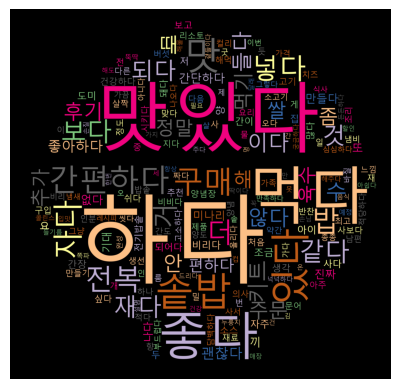

In [260]:
wc_kurly(data_kurly_positive[data_kurly['pred_score']>=0.95]['token_selected'])

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_13460\820593652.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wc_kurly(data_kurly_negative[data_kurly['pred_score']>=0.95]['token_selected'])


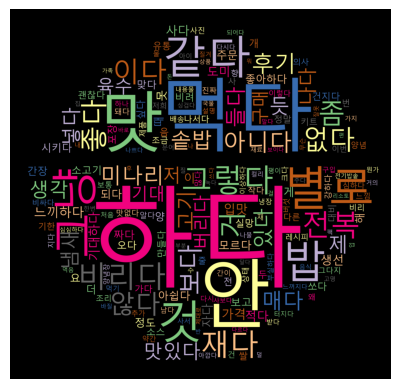

In [261]:
wc_kurly(data_kurly_negative[data_kurly['pred_score']>=0.95]['token_selected'])

In [262]:
data_kurly.to_excel("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_temp.xlsx")